## **Handwritten Digits Prediction using SVM model**

In [155]:
import pandas as pd
import numpy as np

In [9]:
numbers = pd.read_csv('mnist_train.csv')
numbers.head(10)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
numbers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [11]:
numbers.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.000000,60000.000000,60000.000000,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002100,0.007833,0.003600,0.000150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000267,0.000917,0.009283,0.024283,0.043717,0.06410,0.120133,...,3.534933,2.591817,1.701167,1.008600,0.540283,0.238400,0.075267,0.016167,0.000517,0.000983,0.0,0.0,0.0,0.0,0.0,0.0,0.002533,0.015583,0.041633,0.089200,0.128217,0.196733,0.336017,0.429967,0.525983,0.590683,0.688033,0.592067,0.482733,0.343517,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.475324,1.361189,0.881816,0.036742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.065320,0.194636,1.055011,2.095113,2.962063,3.32388,4.869298,...,26.101169,22.251302,18.107058,13.897102,10.317854,6.552565,3.500306,1.241759,0.114964,0.240866,0.0,0.0,0.0,0.0,0.0,0.0,0.437527,1.721198,2.601220,4.032627,4.776047,6.177880,7.680724,9.093559,9.898373,10.431982,11.403013,10.517303,9.397896,8.057733,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [12]:
round(100*(numbers.isnull().sum()/(len(numbers.index))),2).sort_values(ascending = False)

28x28    0.0
10x16    0.0
10x14    0.0
10x13    0.0
10x12    0.0
        ... 
19x16    0.0
19x15    0.0
19x14    0.0
19x13    0.0
label    0.0
Length: 785, dtype: float64

In [13]:
np.unique(numbers['label'])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [14]:
numbers['label'].value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: label, dtype: int64

**visualising Dataset**

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


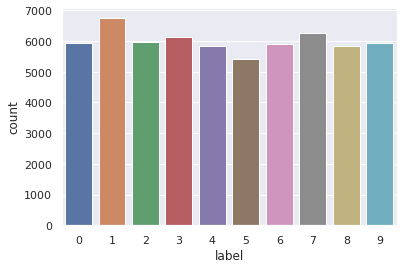

In [17]:
sns.countplot(numbers['label'])

Text(0, 0.5, 'Frequency')

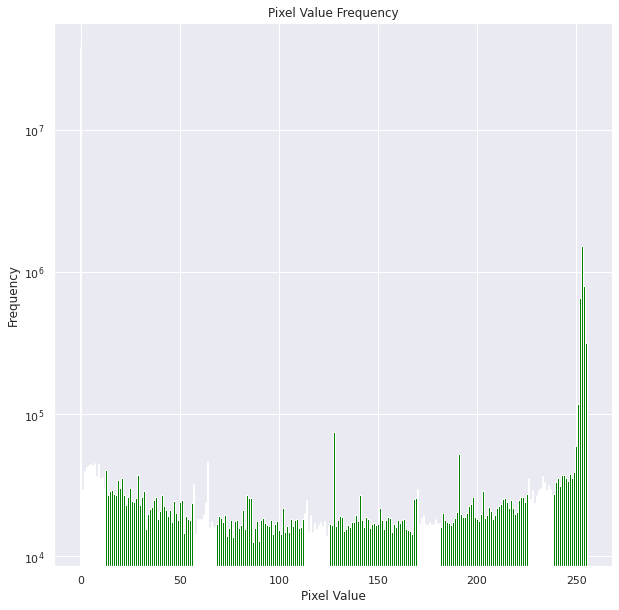

In [27]:
y = pd.value_counts(numbers.values.ravel()).sort_index()
N = len(y)
x = range(N)
wdth =0.8
plt.figure(figsize=[10,10])
plt.bar(x, y,width, color="green")
plt.title('Pixel Value Frequency')
plt.yscale('log')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


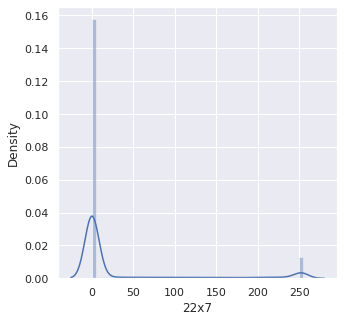

In [28]:
plt.figure(figsize=(5,5))
sns.distplot(numbers['22x7'])

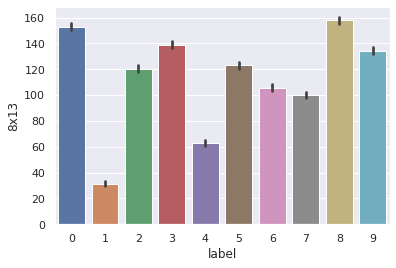

In [31]:
sns.barplot(x='label', y='8x13', data=numbers)

Text(0.5, 1.0, 'Digit 9')

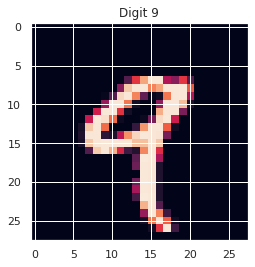

In [47]:
nine = numbers.iloc[4, 1:]
nine = nine.values.reshape(28,28)
plt.imshow(nine)
plt.title("Digit 9")

Text(0.5, 1.0, 'Digit 0')

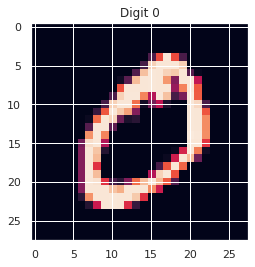

In [48]:
zero = numbers.iloc[1, 1:]
zero = zero.values.reshape(28,28)
plt.imshow(zero)
plt.title("Digit 0")

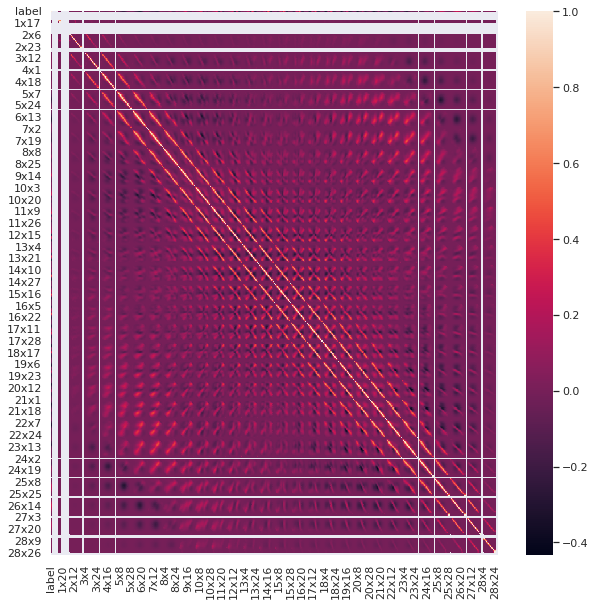

In [50]:
plt.figure(figsize=(10,10))
sns.heatmap(data=numbers.corr(),annot=False)

**Data Preprocessing**


In [51]:
pd.set_option('display.max_rows', 999)
round(numbers.drop('label', axis=1).mean(), 2).sort_values(ascending = False)

15x16    139.55
16x16    139.11
15x17    137.10
16x15    135.69
8x16     135.40
8x17     133.34
8x15     132.76
22x15    131.84
16x17    131.80
22x14    130.37
15x15    130.27
14x17    129.81
15x18    128.09
17x16    127.43
8x18     126.68
14x18    126.60
17x15    126.47
21x16    125.56
23x14    125.30
8x14     125.00
21x15    124.95
22x16    124.87
7x16     124.10
14x16    123.97
9x14     123.39
16x14    123.20
9x15     123.04
9x17     122.73
22x13    122.59
23x13    122.52
9x16     122.34
9x18     122.14
7x17     121.71
16x18    121.44
17x17    121.06
23x15    120.61
9x13     119.44
7x15     118.51
21x17    118.22
20x16    117.80
13x18    117.58
21x14    117.34
9x19     116.26
20x17    115.92
17x14    115.86
18x16    115.44
15x14    115.42
8x19     113.55
23x12    113.10
13x17    113.04
18x15    112.62
22x12    112.46
20x15    112.45
18x17    112.24
19x16    112.20
7x18     112.03
8x13     111.58
14x15    111.37
19x17    111.35
17x18    111.22
10x19    111.08
10x18    110.88
10x13   

In [52]:
X = numbers.drop("label", axis = 1)
y = numbers['label']

In [53]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

In [64]:
X_scaled = scale(X)
x_train,x_test,y_train,y_test=train_test_split(X_scaled, y, test_size=0.8,random_state=1234)

In [65]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [66]:
x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [67]:
y_train

20500    3
40501    6
26872    4
8871     6
20028    2
        ..
23924    6
56373    6
34086    0
58067    3
27439    1
Name: label, Length: 12000, dtype: int64

In [68]:
y_test

30329    2
44957    7
30866    1
40447    3
25580    5
        ..
32631    6
31564    3
38803    4
25565    9
57347    6
Name: label, Length: 48000, dtype: int64

 **Training SVM Model**

In [129]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

In [69]:
model=SVC(kernel="linear")           #using Linear model
model.fit(x_train,y_train)

SVC(kernel='linear')

In [72]:
pred=model.predict(x_test)

In [73]:
pred

array([2, 7, 1, ..., 4, 9, 6])

In [94]:
accuracy =  metrics.accuracy_score(y_test,pred)
accuracy

0.9422916666666666

In [85]:
metrics = metrics.confusion_matrix(y_test,pred)
metrics

array([[4579,    1,   21,    9,    7,   11,   31,   15,   21,    0],
       [   2, 5296,   32,   12,    8,    4,    5,   28,   15,    6],
       [  18,   18, 4488,   42,   27,    6,   21,  105,   38,    7],
       [   2,   17,   92, 4493,    9,   94,    5,  132,   57,   21],
       [   6,   12,   41,    3, 4439,    9,   21,   55,    7,  106],
       [  14,   10,   25,   79,   24, 4020,   58,   52,   39,   22],
       [  12,   11,   24,    0,   12,   39, 4569,   86,   11,    0],
       [   8,   25,   42,    9,   53,    2,    1, 4738,   12,   72],
       [  22,   57,   36,   66,   20,   83,   22,   38, 4304,   31],
       [  20,   12,   22,   71,   99,   13,    1,  183,   33, 4304]])

In [96]:
rbf_model = SVC(kernel='rbf')      #rbf kernel


rbf_model.fit(x_train, y_train)




SVC()

In [97]:
pred = rbf_model.predict(x_test)
pred

array([2, 7, 1, ..., 4, 9, 6])

In [100]:
accuracy=  metrics.accuracy_score(y_test, pred)
accuracy


0.9422916666666666

In [101]:
metrics =  metrics.confusion_matrix(y_test,pred)
metrics

array([[4579,    1,   21,    9,    7,   11,   31,   15,   21,    0],
       [   2, 5296,   32,   12,    8,    4,    5,   28,   15,    6],
       [  18,   18, 4488,   42,   27,    6,   21,  105,   38,    7],
       [   2,   17,   92, 4493,    9,   94,    5,  132,   57,   21],
       [   6,   12,   41,    3, 4439,    9,   21,   55,    7,  106],
       [  14,   10,   25,   79,   24, 4020,   58,   52,   39,   22],
       [  12,   11,   24,    0,   12,   39, 4569,   86,   11,    0],
       [   8,   25,   42,    9,   53,    2,    1, 4738,   12,   72],
       [  22,   57,   36,   66,   20,   83,   22,   38, 4304,   31],
       [  20,   12,   22,   71,   99,   13,    1,  183,   33, 4304]])

**RBF kernel Model with hyperparameters**

In [103]:
final_model = SVC(C=10, gamma=0.001, kernel="rbf")    #using gamma =0.001
final_model.fit(x_train, y_train)
pred = final_model.predict(x_test)


In [123]:
accuracy =metrics.accuracy_score(y_test, pred)
accuracy


0.9511041666666666

In [124]:
metrics = metrics.confusion_matrix(y_test, pred)
metrics

array([[4599,    2,   15,    7,    5,    9,   32,   10,   15,    1],
       [   2, 5315,   24,   12,    4,    3,    6,   24,   13,    5],
       [  22,   19, 4532,   42,   24,    5,   19,   74,   27,    6],
       [   2,   12,   86, 4587,    5,   72,    4,   89,   46,   19],
       [   6,   17,   29,    1, 4477,    5,   19,   35,    4,  106],
       [  24,   12,   24,   74,   25, 4052,   45,   37,   32,   18],
       [  25,    7,   33,    0,   17,   25, 4584,   60,   13,    0],
       [  10,   24,   42,   11,   59,    2,    1, 4739,   12,   62],
       [  23,   46,   28,   60,   21,   69,   27,   26, 4354,   25],
       [  16,   13,   18,   43,  107,   14,    1,  108,   24, 4414]])

**Visualising predicted output**

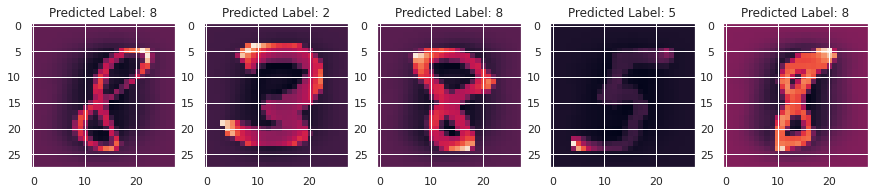

In [139]:
df = np.random.randint(1,pred.shape[0]+1,5)
plt.figure(figsize=(15,5))
for i,j in enumerate(df):
    plt.subplot(150+i+1)
    plot = x_test[j].reshape(28,28)
    plt.title(f'Predicted Label: {pred[j]}')
    plt.imshow(plot)
plt.show()

**using final_model on TestDataSet**

In [141]:
test_df = pd.read_csv('mnist_test.csv')
test_df.head(10)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [142]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 59.9 MB


In [151]:
test_df.drop(columns=test_df.columns[0], 
        axis=1, 
        inplace=True)

In [152]:
test_scaled = scale(test_df)

In [153]:
test_predict = final_model.predict(test_scaled)

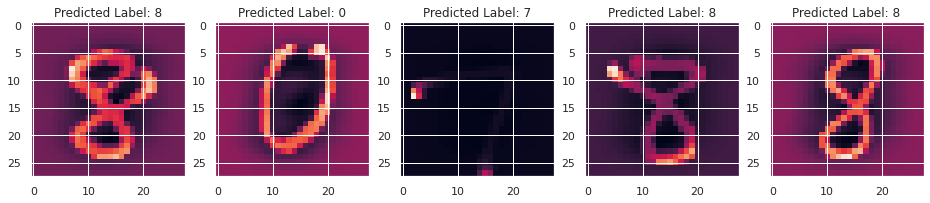

In [154]:
df = np.random.randint(1,test_predict.shape[0]+1,5)

plt.figure(figsize=(16,4))
for i,j in enumerate(df):
    plt.subplot(150+i+1)
    d = test_scaled[j].reshape(28,28)
    plt.title(f'Predicted Label: {test_predict[j]}')
    plt.imshow(d)
plt.show()

**We have successfully predicted  correct handwritten letters using SVM**
**with RBF kernel using hyperparameter to get correct results with best accuracy**